In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
uber=pd.read_csv('Delivery_11,06-14,07.csv',index_col=0)

In [3]:
uber

,",date",",time_requested",all_distance,distance_to_customer,"delivery_time,","plase_with_order,","customer_address,",cost,"tips,",bonus
№,,,,,,,,,,
1,11.06,17:04,4,0.7,22-57,La-frizzante Pizza and Kebab,Kazimira Pułaskiego 133,"9,69",NaN,NaN
2,11.06,17:30,"4,6","1,8",24-08,McDonald's-Kopernika,Mikoaja Kopernika3,"12,44",NaN,NaN
3,11.06,18:29,"3,4","0,5",16-58,La-frizzante Pizza and Kebab,Zachodnia 30A,"9,16",NaN,NaN
4,11.06,18:51,"6,4","4,4",28-54,McDonald's-Kopernika,"Kleosin, Jana Pawła II 25","19,16",NaN,NaN
5,11.06,20:29,"5,8",1,30-47,Retrospekcja Naleśnikarnia,Wiejska 8,"9,74",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
86,14.07,18:40,"2,8","1,4",17-12,Kolos Kebab,Monte Cassino 3,"12,31",NaN,NaN
87,14.07,19:20,6,"3,8",23-45,McDonald's-Kopernika,Kleosin Mickiewicza 25,"17,66",NaN,NaN
88,14.07,19:49,"5,8","1,9",35-30,McDonald's-Wysyńskiego,Legionowa 9,"13,83",NaN,NaN


In [4]:
uber.columns = uber.columns.astype(str)
uber.columns = uber.columns.str.replace(',', '')

In [5]:
uber['delivery_time'][8]
uber.loc[8, 'delivery_time'] = uber.loc[8, 'delivery_time'].replace(',', ':')
uber.loc[60, 'delivery_time'] = uber.loc[60, 'delivery_time'].replace(',', ':')

In [6]:
year = 2023

uber['date'] = pd.to_datetime(uber['date'].astype(str) + '.' + str(year), format='%d.%m.%Y', errors='coerce')


uber['delivery_time'] = uber['delivery_time'].str.replace('-', ':')
uber[['minutes', 'seconds']] = uber['delivery_time'].str.split(':', expand=True)

uber['minutes'] = pd.to_numeric(uber['minutes'])
uber['seconds'] = pd.to_numeric(uber['seconds'])
uber['seconds']  = uber['seconds'] .fillna(0)

uber['total_seconds'] = uber['minutes'] * 60 + uber['seconds']
uber['total_seconds'].describe()
zero_rows = uber.loc[uber['total_seconds'] == 3047]
zero_rows

,date,time_requested,all_distance,distance_to_customer,delivery_time,plase_with_order,customer_address,cost,tips,bonus,minutes,seconds,total_seconds
№,,,,,,,,,,,,,
70,2023-07-02,22:08,"9,9","2,4",50:47,La-frizzante Pizza and Kebab,Kleosin Wyszyńskiego,"12,99",NaN,NaN,50,47.0,3047.0


In [7]:
uber.loc[22,'all_distance'] =3.1
uber['all_distance'] = uber['all_distance'].astype(str)


In [8]:
uber['time_requested'] = pd.to_datetime(uber['time_requested'], format='%H:%M')

uber['time_requested'] = uber['time_requested'].dt.time

In [9]:
def get_week_date_range(date):
    start_of_week = date - timedelta(days=date.weekday())
    end_of_week = start_of_week + timedelta(days=6)
    return f"{start_of_week:%m-%d} to {end_of_week:%m-%d}"
uber['week_date_range'] = uber['date'].apply(get_week_date_range)

In [10]:
uber['week_date_range']
pd.set_option('display.max_rows', None)
uber

,date,time_requested,all_distance,distance_to_customer,delivery_time,plase_with_order,customer_address,cost,tips,bonus,minutes,seconds,total_seconds,week_date_range
№,,,,,,,,,,,,,,
1,2023-06-11,17:04:00,4,0.7,22:57,La-frizzante Pizza and Kebab,Kazimira Pułaskiego 133,"9,69",NaN,NaN,22,57.0,1377.0,06-05 to 06-11
2,2023-06-11,17:30:00,"4,6","1,8",24:08,McDonald's-Kopernika,Mikoaja Kopernika3,"12,44",NaN,NaN,24,8.0,1448.0,06-05 to 06-11
3,2023-06-11,18:29:00,"3,4","0,5",16:58,La-frizzante Pizza and Kebab,Zachodnia 30A,"9,16",NaN,NaN,16,58.0,1018.0,06-05 to 06-11
4,2023-06-11,18:51:00,"6,4","4,4",28:54,McDonald's-Kopernika,"Kleosin, Jana Pawła II 25","19,16",NaN,NaN,28,54.0,1734.0,06-05 to 06-11
5,2023-06-11,20:29:00,"5,8",1,30:47,Retrospekcja Naleśnikarnia,Wiejska 8,"9,74",NaN,NaN,30,47.0,1847.0,06-05 to 06-11
6,2023-06-11,20:53:00,"4,4",3,26:07,McDonald's-Wysyńskiego,Wierzbowa 5,"15,58",NaN,NaN,26,7.0,1567.0,06-05 to 06-11
7,2023-06-11,21:27:00,"5,9",4,41:47,McDonald's-Wysyńskiego,Porzeczkowa 13,"18,17",NaN,NaN,41,47.0,2507.0,06-05 to 06-11
8,2023-06-11,21:56:00,"2,7","1,1",22:23,Pizzeria Pruszynska,Blokowa 4,"9,9",NaN,NaN,22,23.0,1343.0,06-05 to 06-11
9,2023-06-11,22:13:00,"5,4",1.5,35:34,McDonald's-Wysyńskiego,Prezydenta Kaczorowskiego 14,"11,7",NaN,NaN,35,34.0,2134.0,06-05 to 06-11


In [11]:
uber[['all_distance','distance_to_customer']]=uber[['all_distance','distance_to_customer']].applymap(lambda x: x.replace(',', '.'))


In [12]:
uber['cost'] = uber['cost'].astype(str).str.replace(',', '.')
uber['cost'] = uber['cost'].astype(float)
uber['hours'] = uber['total_seconds'] / 3600

In [13]:
uber[['all_distance','distance_to_customer']]=uber[['all_distance','distance_to_customer']].astype(float)

In [14]:
grouped_data = uber.groupby(['date'])
sec_all_dist_for_day = grouped_data[['all_distance','total_seconds','cost']].sum()

In [15]:
sec_all_dist_for_day

,all_distance,total_seconds,cost
date,,,
2023-06-11,42.6,14975.0,115.54
2023-06-12,17.3,6030.0,34.60
2023-06-21,10.5,3991.0,44.59
2023-06-22,26.7,10190.0,90.67
2023-06-23,38.6,14801.0,158.51
2023-06-24,14.1,6023.0,84.11
2023-06-25,21.6,7991.0,96.31
2023-06-28,23.1,9714.0,75.17
2023-06-29,16.0,6135.0,75.36


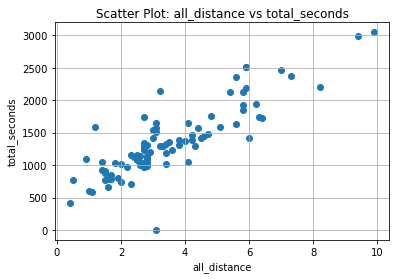

In [16]:
plt.scatter(uber['all_distance'], uber['total_seconds'])

plt.xlabel('all_distance')
plt.ylabel('total_seconds')
plt.title('Scatter Plot: all_distance vs total_seconds')
plt.grid(True)

In [17]:
cost_value_counts = uber['cost'].describe()
print(cost_value_counts)

count    89.000000
mean     13.877865
std       5.109474
min       2.900000
25%      10.770000
50%      12.480000
75%      15.020000
max      41.160000
Name: cost, dtype: float64


In [18]:
median_cost = uber['cost'].median()
median_cost
mean_cost = uber['cost'].mean()
mean_cost,median_cost

(13.877865168539326, 12.48)

In [19]:
print(f"Mean_cost: {mean_cost:.2f} PLN")
print(f"Median_cost: {median_cost:.2f} PLN")

Mean_cost: 13.88 PLN
Median_cost: 12.48 PLN


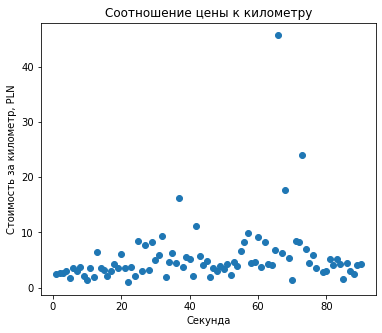

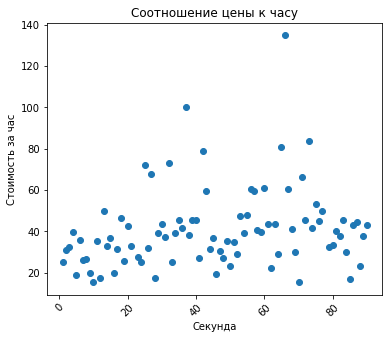

In [20]:

uber['cost_per_km'] = uber['cost'] / uber['all_distance']
uber['cost_per_hour'] = uber['cost'] / uber['total_seconds'] * 3600

plt.figure(figsize=(6, 5))

plt.scatter(uber.index, uber['cost_per_km'])

plt.xlabel('Секунда')
plt.ylabel('Стоимость за километр, PLN')
plt.title('Соотношение цены к километру')
plt.show()
plt.figure(figsize=(6, 5))
plt.scatter(uber.index, uber['cost_per_hour'])
plt.xlabel('Секунда')
plt.ylabel('Стоимость за час')
plt.axhline(y=uber['cost_per_hour'].mean(), color='green', linestyle='dashed', label='Среднее значение стоимости за час')
plt.title('Соотношение цены к часу')
plt.xticks(rotation=45) 
plt.show()


In [21]:
mean_cost =uber['cost_per_hour'].mean()
mean_cost
print(f"Mean_cost: {mean_cost:.2f} PLN")

Mean_cost: inf PLN


In [22]:
column_types = uber.dtypes
column_types

date                    datetime64[ns]
time_requested                  object
all_distance                   float64
distance_to_customer           float64
delivery_time                   object
plase_with_order                object
customer_address                object
cost                           float64
tips                            object
bonus                          float64
minutes                          int64
seconds                        float64
total_seconds                  float64
week_date_range                 object
hours                          float64
cost_per_km                    float64
cost_per_hour                  float64
dtype: object

In [23]:
zero_rows = uber[uber['total_seconds'] == 0]
median_sec = uber['total_seconds'][uber['total_seconds'].ne(0)].median() 

zero_rows 

,date,time_requested,all_distance,distance_to_customer,delivery_time,plase_with_order,customer_address,cost,tips,bonus,minutes,seconds,total_seconds,week_date_range,hours,cost_per_km,cost_per_hour
№,,,,,,,,,,,,,,,,,
22,2023-06-23,11:53:00,3.1,0.0,0,Subway-Alfa,Świętojańska 15,2.9,NaN,NaN,0,0.0,0.0,06-19 to 06-25,0.0,0.935484,inf


In [24]:
grouped_data = uber.groupby(['plase_with_order'])
sec_all_dist_for_day = grouped_data[['all_distance','hours','cost']].sum()
sec_all_dist_for_day = sec_all_dist_for_day.sort_values(by='all_distance', ascending=False)
obj_type = type(sec_all_dist_for_day)
obj_type

pandas.core.frame.DataFrame

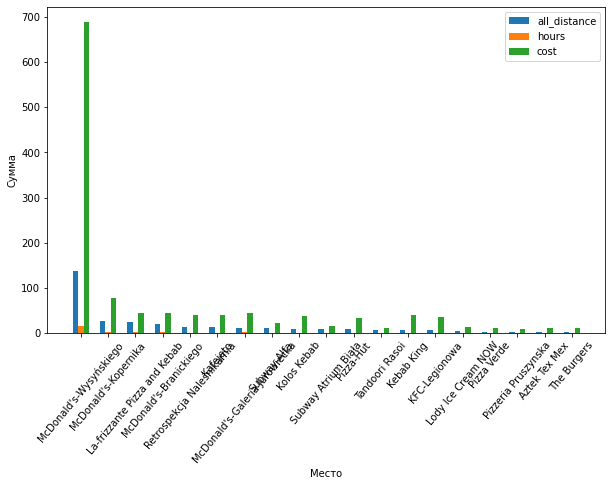

pandas.core.series.Series

In [25]:
plt.figure(figsize=(10, 6))
places = sec_all_dist_for_day.index
num_bars = 3
bar_width = 0.2
positions = range(len(places))
for i in range(num_bars):
    plt.bar([p + i * bar_width for p in positions],
            sec_all_dist_for_day.iloc[:, i],
            width=bar_width,
            label=sec_all_dist_for_day.columns[i])
plt.xticks([p + bar_width for p in positions], places)
plt.xlabel('Место')
plt.ylabel('Сумма')
plt.xticks(rotation=50)
plt.legend()

plt.show()

type(uber['time_requested'])

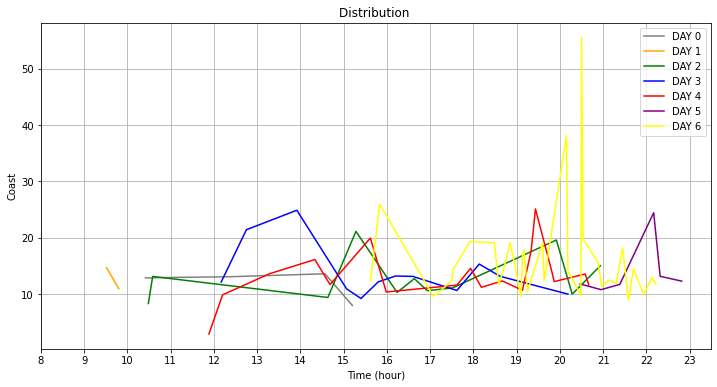

In [26]:
uber['dayofweek'] = uber['date'].dt.dayofweek

column_data_type = uber['time_requested'].dtype

uber['time_in_minutes'] = uber['time_requested'].apply(lambda x: x.hour * 60 + x.minute)

start_hour = 8
end_hour = 23  
start_time = start_hour * 60
end_time = end_hour * 60 + 59
uber_filtered = uber[(uber['time_in_minutes'] >= start_time) & (uber['time_in_minutes'] <= end_time)]

avg_cost_by_day_hour = uber_filtered.groupby(['dayofweek', 'time_in_minutes'])['cost'].sum().reset_index()

avg_cost_by_day_hour['time_in_hours'] = avg_cost_by_day_hour['time_in_minutes'] / 60

plt.figure(figsize=(12, 6))

colors = ['gray', 'orange', 'green', 'blue', 'red', 'purple', 'yellow']

for day in range(7):
    data = avg_cost_by_day_hour[avg_cost_by_day_hour['dayofweek'] == day]
    plt.plot(data['time_in_hours'].astype(float), data['cost'], label=f'DAY {day}', color=colors[day])


plt.xlabel('Time (hour)')
plt.ylabel('Coast')
plt.title('Distribution ')


plt.xticks(range(start_hour, end_hour + 1))


plt.legend()


plt.grid(True)


plt.show()

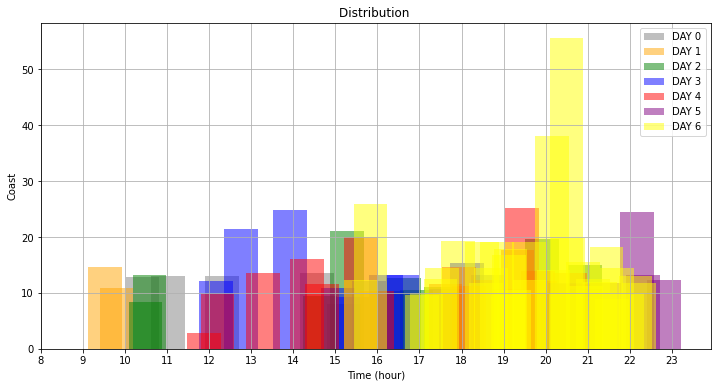

In [27]:

uber['time_in_minutes'] = uber['time_requested'].apply(lambda x: x.hour * 60 + x.minute)

start_hour = 8
end_hour = 23  
start_time = start_hour * 60
end_time = end_hour * 60 + 59
uber_filtered = uber[(uber['time_in_minutes'] >= start_time) & (uber['time_in_minutes'] <= end_time)]

sum_cost_by_day_hour = uber_filtered.groupby(['dayofweek', 'time_in_minutes'])['cost'].sum().reset_index()


sum_cost_by_day_hour['time_in_hours'] = sum_cost_by_day_hour['time_in_minutes'] / 60


plt.figure(figsize=(12, 6))


colors = ['gray', 'orange', 'green', 'blue', 'red', 'purple', 'yellow']
for day in range(7):
    data = sum_cost_by_day_hour[sum_cost_by_day_hour['dayofweek'] == day]
    plt.bar(data['time_in_hours'].astype(float), data['cost'], label=f'DAY {day}', color=colors[day], alpha=0.5)


plt.xlabel('Time (hour)')
plt.ylabel('Coast')
plt.title('Distribution ')


plt.xticks(range(start_hour, end_hour + 1))


plt.legend()


plt.grid(True)


plt.show()



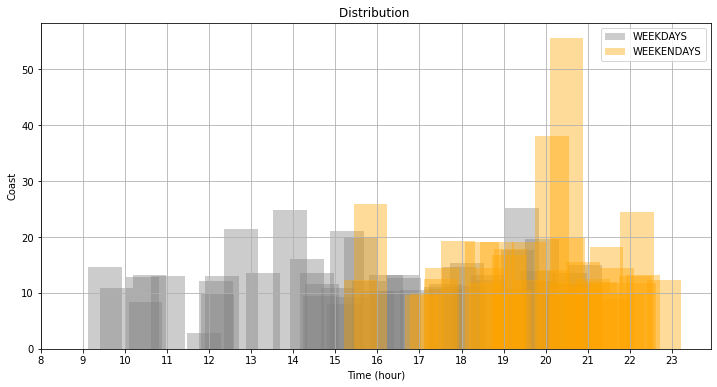

In [28]:


uber['time_in_minutes'] = uber['time_requested'].apply(lambda x: x.hour * 60 + x.minute)


start_hour = 8
end_hour = 23 
start_time = start_hour * 60
end_time = end_hour * 60 + 59
uber_filtered = uber[(uber['time_in_minutes'] >= start_time) & (uber['time_in_minutes'] <= end_time)]


sum_cost_by_day_hour = uber_filtered.groupby(['dayofweek', 'time_in_minutes'])['cost'].sum().reset_index()


sum_cost_by_day_hour['time_in_hours'] = sum_cost_by_day_hour['time_in_minutes'] / 60

sum_cost_by_day_hour['day_category'] = sum_cost_by_day_hour['dayofweek'].replace({0: 'WEEKDAYS', 1: 'WEEKDAYS', 2: 'WEEKDAYS', 3: 'WEEKDAYS', 4: 'WEEKDAYS', 5: 'WEEKENDAYS', 6: 'WEEKENDAYS'})


plt.figure(figsize=(12, 6))


colors = {'WEEKDAYS': 'gray', 'WEEKENDAYS': 'orange'}
for category, data in sum_cost_by_day_hour.groupby('day_category'):
    plt.bar(data['time_in_hours'].astype(float), data['cost'], label=f'{category}', color=colors[category], alpha=0.4)


plt.xlabel('Time (hour)')
plt.ylabel('Coast')
plt.title('Distribution ')


plt.xticks(range(start_hour, end_hour + 1))


plt.legend()


plt.grid(True)

plt.show()

